In [2]:
#Classify antimicrobial peptides
#Data and paper https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-3327-y

import numpy as np
import pandas as pd
import keras
from keras.preprocessing.sequence import pad_sequences

In [18]:
from Bio import SeqIO
import numpy as np 

positives_train=[]
negatives_train=[]
positives_test=[]
negatives_test=[]
positives_eval=[]
negatives_eval=[]

for seq_record in SeqIO.parse('AMP.tr.fa', "fasta"):
    
    positives_train.append(str(seq_record.seq))
    
for seq_record in SeqIO.parse('DECOY.tr.fa', "fasta"):
    
    negatives_train.append(str(seq_record.seq))
    
for seq_record in SeqIO.parse('DECOY.te.fa', "fasta"):
    
    negatives_test.append(str(seq_record.seq)) 
    
for seq_record in SeqIO.parse('AMP.te.fa', "fasta"):
    
    positives_test.append(str(seq_record.seq))
    
for seq_record in SeqIO.parse('DECOY.eval.fa', "fasta"):
    
    negatives_eval.append(str(seq_record.seq)) 
    
for seq_record in SeqIO.parse('AMP.eval.fa', "fasta"):
    
    positives_eval.append(str(seq_record.seq))    
    
    
X_train=list(positives_train+negatives_train)

y_train=list(np.ones(np.array(positives_train).shape[0]))+list(np.zeros(np.array(negatives_train).shape[0]))

X_test=list(positives_test+negatives_test)

y_test=list(np.ones(np.array(positives_test).shape[0]))+list(np.zeros(np.array(negatives_test).shape[0]))

X_eval=list(positives_eval+negatives_eval)

y_eval=list(np.ones(np.array(positives_eval).shape[0]))+list(np.zeros(np.array(negatives_eval).shape[0]))
    

In [19]:
import numpy as np
import re
def string_to_array(my_string):
    my_string = my_string.lower()
    my_string = re.sub('[^arndcqeghilkmfpstwyvx]', 'z', my_string)
    my_array = np.array(list(my_string))
    return my_array

# create a label encoder with alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','r','n','d','c','q','e','g','h','i','l','k','m','f','p','s','t','w','y','v','x','z']))

def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 1.25 # A
    float_encoded[float_encoded == 1] = 2.50 # R
    float_encoded[float_encoded == 2] = 3.75 # N
    float_encoded[float_encoded == 3] = 4.30 # D
    float_encoded[float_encoded == 4] = 5.45 # C
    float_encoded[float_encoded == 5] = 6.35 # Q
    float_encoded[float_encoded == 6] = 7.85 # E 
    float_encoded[float_encoded == 7] = 8.65 # G
    float_encoded[float_encoded == 8] = 9.95 # H
    float_encoded[float_encoded == 9] = 11.25 # I
    float_encoded[float_encoded == 10] = 12.55 # L
    float_encoded[float_encoded == 11] = 13.15 # K
    float_encoded[float_encoded == 12] = 14.11 # L
    float_encoded[float_encoded == 13] = 15.29 # K
    float_encoded[float_encoded == 14] = 16.39 # M
    float_encoded[float_encoded == 15] = 17.05 # F
    float_encoded[float_encoded == 16] = 18.09 # P
    float_encoded[float_encoded == 17] = 19.49 # S
    float_encoded[float_encoded == 18] = 20.79 # T
    float_encoded[float_encoded == 19] = 21.19 # W
    float_encoded[float_encoded == 20] = 22.55 # Y
    float_encoded[float_encoded == 21] = 23.95 # V
    float_encoded[float_encoded == 22] = 24.45 # X
    float_encoded[float_encoded == 10] = 0.0 # anything else z
    

    return float_encoded

In [20]:
X=list(X_train)
y=list(y_train)

for i in X_test : 
    X.append(i)
    
for i in X_eval:
    X.append(i)

for i in y_test : 
    y.append(i)    
    

X=[np.array(ordinal_encoder(string_to_array(i))) for i in X]
X=np.array(X)
X=pad_sequences(X)

X=X.reshape(X.shape[0],X.shape[1],1)
y_train=np.array(y)


/opt/miniconda3/envs/python2/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [9]:
X_train=X[0:2848]
X_eval=X[2848:]

In [10]:
X_eval.shape

(708, 183, 1)

In [11]:
ytrain_2 = keras.utils.to_categorical(y)
y_eval_2 = keras.utils.to_categorical(y_eval)

In [12]:
y_eval_2.shape

(708, 2)

In [29]:
import keras

NUM_CLASSES = 2

# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv1D,  Flatten, Dense, Activation, Dropout,BatchNormalization,LSTM, MaxPool1D
from keras.layers.advanced_activations import LeakyReLU

In [30]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    model = Sequential()
    
    model.add(Conv1D(input_shape=X_train[0].shape,padding="same",kernel_size=3,filters=16))
    model.add(LSTM(100, return_sequences=True))
    model.add(MaxPool1D())
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())


    
    
    model.add(Conv1D(padding="same",kernel_size=3,filters=32))
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())


    model.add(Dropout(0.25))
    model.add(Conv1D(padding="same",kernel_size=3,filters=32))
    model.add(MaxPool1D())
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())

    model.add(Conv1D(padding="same",kernel_size=3,filters=64))
    model.add(MaxPool1D())
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())

    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(LeakyReLU(0.1))
    
    model.add(Activation("softmax"))
    
    return model



In [31]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 183, 16)           64        
_________________________________________________________________
lstm (LSTM)                  (None, 183, 100)          46800     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 91, 100)           0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 91, 100)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 91, 100)           400       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 91, 32)            9632      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 91, 32)            0

In [35]:
from keras import backend as K
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 50


# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 2-way classification
    optimizer=keras.optimizers.Adamax(lr=INIT_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

# fit model
history = model.fit(
    X_train, ytrain_2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    
    validation_data=(X_eval, y_eval_2),
    shuffle=True,
    verbose=1
)

Epoch 1/50
89/89 [==============================] - 48s 357ms/step - loss: 0.7433 - accuracy: 0.5173 - val_loss: 0.6922 - val_accuracy: 0.5155
Epoch 2/50
89/89 [==============================] - 28s 313ms/step - loss: 0.6977 - accuracy: 0.5264 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 3/50
89/89 [==============================] - 27s 302ms/step - loss: 0.6790 - accuracy: 0.5652 - val_loss: 0.7338 - val_accuracy: 0.5000
Epoch 4/50
89/89 [==============================] - 27s 301ms/step - loss: 0.6617 - accuracy: 0.5995 - val_loss: 0.7293 - val_accuracy: 0.5000
Epoch 5/50
89/89 [==============================] - 29s 323ms/step - loss: 0.6593 - accuracy: 0.6186 - val_loss: 0.7185 - val_accuracy: 0.5042
Epoch 6/50
89/89 [==============================] - 28s 315ms/step - loss: 0.6412 - accuracy: 0.6316 - val_loss: 0.6458 - val_accuracy: 0.6201
Epoch 7/50
89/89 [==============================] - 29s 331ms/step - loss: 0.6403 - accuracy: 0.6383 - val_loss: 0.8314 - val_accuracy: 0.5339

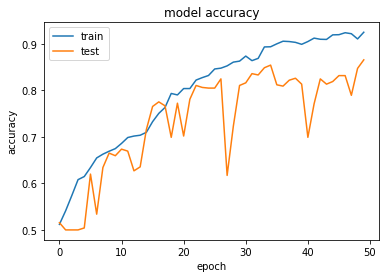

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
test_predictions = model.predict(X_eval).argmax(axis=-1)

In [39]:
test_answers = y_eval_2.argmax(axis=-1)

In [40]:
test_accuracy = np.mean(test_predictions==test_answers)

In [41]:
print(str(test_accuracy*100)+"%")

86.5819209039548%


In [21]:
import sklearn
from sklearn.decomposition import PCA

X = list(X_train)

for i in X_test : 
    X.append(i)
    
for i in X_eval:
    X.append(i)



X=[np.array(ordinal_encoder(string_to_array(i))) for i in X]
X=np.array(X)
X=pad_sequences(X)

/opt/miniconda3/envs/python2/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [22]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [23]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_pca)
    distortions.append(kmeanModel.inertia_)

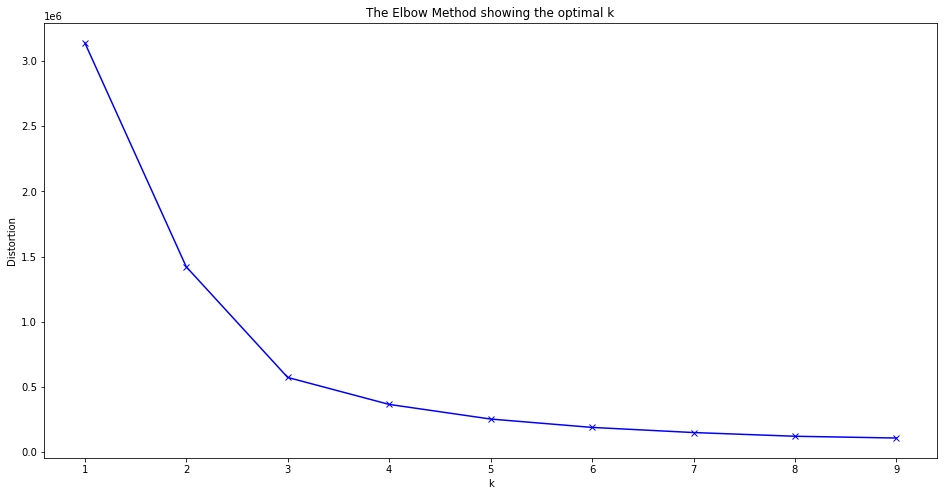

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

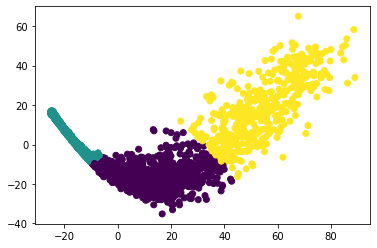

In [27]:
kmeans = KMeans(n_clusters= 3)
kmeans.fit(X_pca)
plt.scatter(X_pca[:,0].T,X_pca[:,1].T, c=kmeans.labels_)